In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
import seaborn as sns
%matplotlib inline


In [52]:
import pandas as pd

data = pd.read_csv("2022 GDPR_fines_cleaned.csv")

# Group by "Country" and find the maximum value in the "Amount" column for each group
filtered_data = data.groupby("Country")["Amount"].max().reset_index()

# Output the filtered data
print(filtered_data)


            Country     Amount
0           AUSTRIA    9500000
1           BELGIUM     600000
2          BULGARIA    2600000
3           CROATIA     285000
4            CYPRUS     925000
5    CZECH REPUBLIC     118500
6           DENMARK    1300000
7           ESTONIA     100000
8           FINLAND     608000
9            FRANCE   90000000
10          GERMANY   35258708
11           GREECE   20000000
12          HUNGARY     634000
13          ICELAND      51000
14          IRELAND  405000000
15      ISLE OF MAN     202000
16            ITALY   27800000
17           LATVIA     150000
18    LIECHTENSTEIN       4100
19        LITHUANIA     110000
20       LUXEMBOURG  746000000
21            MALTA      65000
22           NORWAY    6300000
23           POLAND    1000000
24         PORTUGAL    4300000
25          ROMANIA     150000
26         SLOVAKIA      50000
27            SPAIN   10000000
28           SWEDEN    5000000
29  THE NETHERLANDS    3700000
30   UNITED KINGDOM   22046000


In [54]:
# Group by "Country" and find the row with the maximum value in the "Amount" column for each group
filtered_data = data.groupby("Country").apply(lambda x: x.loc[x["Amount"].idxmax()]).reset_index(drop=True)

# Select only the desired columns
filtered_data = filtered_data[["Country", "Amount", "Type"]]

# Output the filtered data
print(filtered_data)
filtered_data.to_csv("output.csv", index=False)

            Country     Amount   
0           AUSTRIA    9500000  \
1           BELGIUM     600000   
2          BULGARIA    2600000   
3           CROATIA     285000   
4            CYPRUS     925000   
5    CZECH REPUBLIC     118500   
6           DENMARK    1300000   
7           ESTONIA     100000   
8           FINLAND     608000   
9            FRANCE   90000000   
10          GERMANY   35258708   
11           GREECE   20000000   
12          HUNGARY     634000   
13          ICELAND      51000   
14          IRELAND  405000000   
15      ISLE OF MAN     202000   
16            ITALY   27800000   
17           LATVIA     150000   
18    LIECHTENSTEIN       4100   
19        LITHUANIA     110000   
20       LUXEMBOURG  746000000   
21            MALTA      65000   
22           NORWAY    6300000   
23           POLAND    1000000   
24         PORTUGAL    4300000   
25          ROMANIA     150000   
26         SLOVAKIA      50000   
27            SPAIN   10000000   
28           S

From the graph we get to see that Luxembourg was the most fined due to non compliance with general data processing principles

C:\Users\User\AppData\Local\Temp\ipykernel_17352\3333293710.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=(0, 0, 0.85, 1))


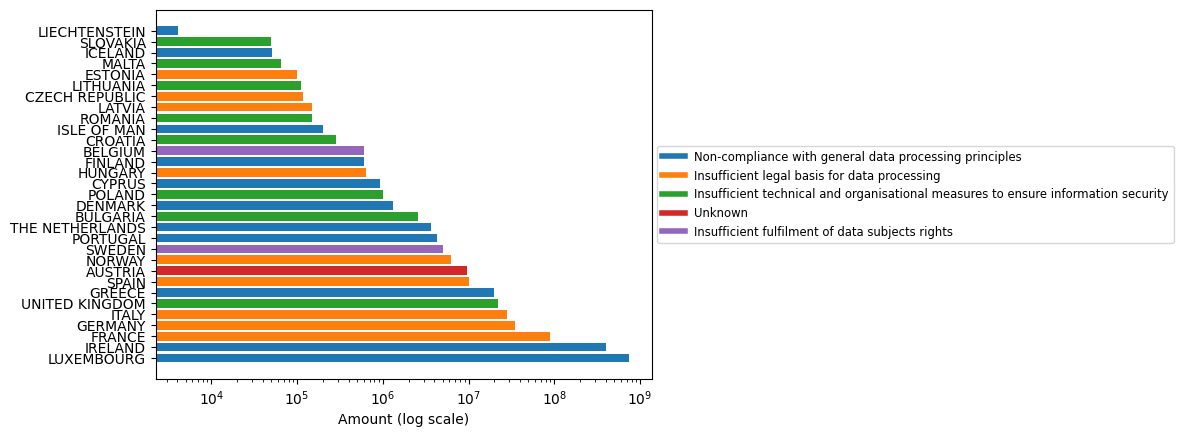

In [88]:
from matplotlib.lines import Line2D

data = pd.read_csv("2022 GDPR_fines_cleaned.csv")

# Group by "Country" and find the row with the maximum value in the "Amount" column for each group
filtered_data = data.groupby("Country").apply(lambda x: x.loc[x["Amount"].idxmax()]).reset_index(drop=True)

# Select the desired columns
filtered_data = filtered_data[["Country", "Amount", "Type"]]

# Sort the data by the "Amount" column in descending order
filtered_data = filtered_data.sort_values("Amount", ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots()

# Assign a unique color to each "Type" category
type_colors = plt.cm.tab10(np.arange(len(filtered_data["Type"].unique())))

# Plot the horizontal bar graph with a logarithmic scale
y_pos = np.arange(len(filtered_data))
amounts = filtered_data["Amount"]
countries = filtered_data["Country"]
types = filtered_data["Type"]

bars = ax.barh(y_pos, amounts, color=type_colors[types.factorize()[0]])
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Set the x-axis to use a logarithmic scale
ax.set_xscale("log")

# Set the x-axis label
ax.set_xlabel("Amount (log scale)")

# Create custom legend handles and labels
legend_handles = [Line2D([0], [0], color=type_colors[i], lw=4) for i in range(len(filtered_data["Type"].unique()))]
legend_labels = filtered_data["Type"].unique()

# Set the legend outside the plot and group color codes
legend = ax.legend(legend_handles, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize="small")

# Adjust the layout to make room for the legend
plt.tight_layout(rect=(0, 0, 0.85, 1))

# Show the plot
plt.show()


In [10]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv("2022 GDPR_fines_cleaned.csv")

# Convert all column names to strings
data.columns = [str(col) for col in data.columns]

# Get the counts of each article column
article_counts = data.iloc[:, 1:].sum(numeric_only=True)

# Sort the article counts in descending order
sorted_counts = article_counts.sort_values(ascending=False)

# Get the top 10 most violated articles
top_10_articles = sorted_counts.head(13)

# Get the count of each article
article_counts_top_10 = data[top_10_articles.index].sum()

# Combine the top 10 articles and their counts into a DataFrame
top_10_articles_with_counts = pd.DataFrame({"Article": top_10_articles.index, "Count": article_counts_top_10})

# Print the top 10 most violated articles with counts
print(top_10_articles_with_counts)


                             Article       Count
Amount                        Amount  2394988400
ID                                ID     1189653
VIOLATED_ARTICLES  VIOLATED_ARTICLES        2660
Art_5                          Art_5         792
Art_6                          Art_6         459
Art_32                        Art_32         275
Art_13                        Art_13         238
Art_12                        Art_12         104
Art_15                        Art_15          83
Art_9                          Art_9          65
Art_21                        Art_21          61
Art_58                        Art_58          54
Art_17                        Art_17          53


In [40]:
company_counts = data['Controller_Processor'].value_counts()
sorted_counts = company_counts.sort_values(ascending=False)
top_10_companies = sorted_counts.head(10)
print(top_10_companies)
top_10_companies.to_csv("top_10_companies.csv")



Controller_Processor
Unknown                    86
Private individual         58
Vodafone España, S.A.U.    49
Company                    24
Private Individual         19
Police officer             18
Xfera Moviles S.A.         16
Homeowners Association     12
Physician                  10
Bank                       10
Name: count, dtype: int64


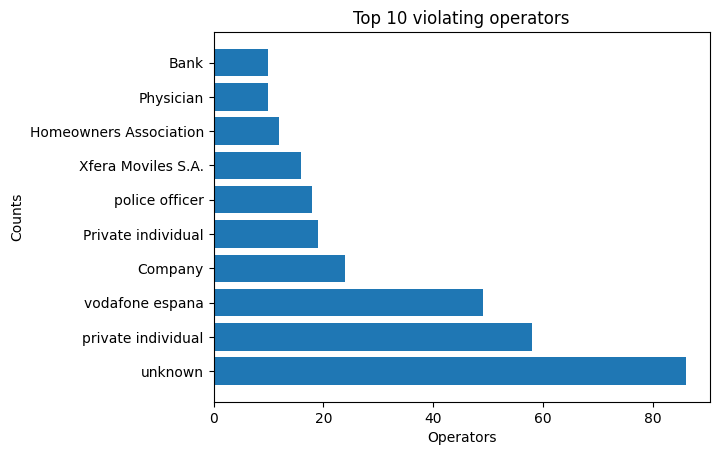

In [44]:
x = np.array(['unknown', 'private individual', 'vodafone espana', 'Company', 'Private individual', 'police officer', 'Xfera Moviles S.A.', 'Homeowners Association', 'Physician', 'Bank'])
y = np.array([86, 58, 49, 24, 19, 18, 16, 12, 10, 10])
plt.title('Top 10 violating operators')
plt.xlabel('Operators')
plt.ylabel('Counts')
plt.barh(x, y)
plt.show()

By ranking the top 10 operators from the data, we get to see an unknown operator(s) having the most violations and vodafone making the top 3.

<function matplotlib.pyplot.show(close=None, block=None)>

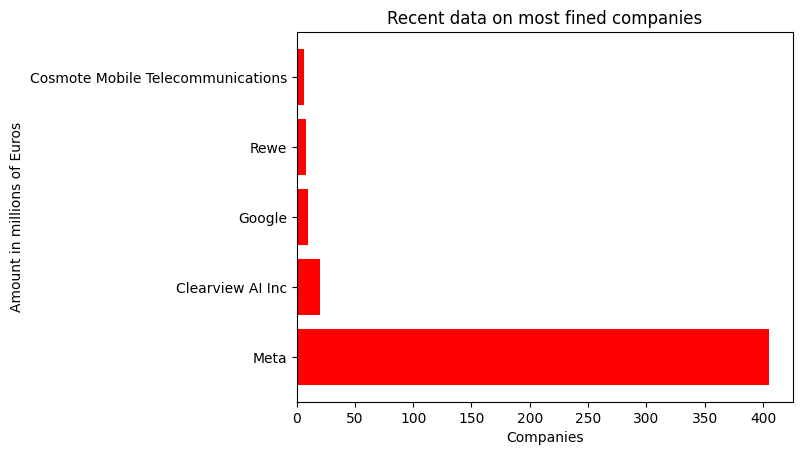

In [96]:
x = np.array(['Meta', 'Clearview AI Inc', 'Google', 'Rewe', 'Cosmote Mobile Telecommunications'])
y = np.array([405, 20, 10, 8, 6])
plt.title('Recent data on most fined companies')
plt.xlabel('Companies')
plt.ylabel('Amount in millions of Euros')
plt.barh(x, y, color = 'red')
plt.show

From the recent data we get to see that meta was the most fined company from a recent study. This was streamed from Instagram violating children's privacy through publication of email addressess and phone numbers

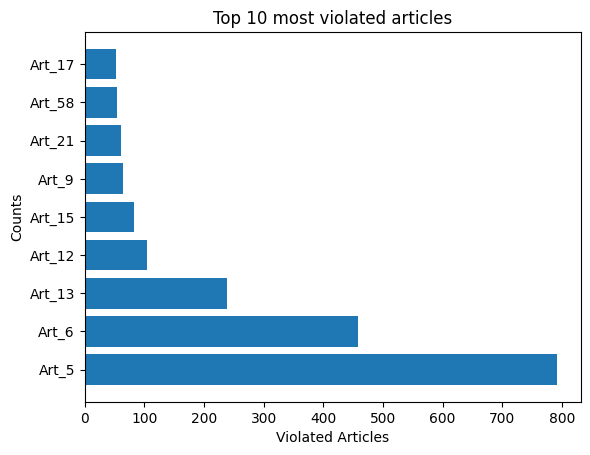

In [31]:
x = np.array(['Art_5', 'Art_6', 'Art_6', 'Art_13', 'Art_12', 'Art_15', 'Art_9', 'Art_21', 'Art_58', 'Art_17'])
y = np.array([792, 459, 275, 238, 104,83, 65, 61, 54, 53])
plt.xlabel('Violated Articles')
plt.ylabel('Counts')
plt.title('Top 10 most violated articles')
plt.barh(x, y)
plt.show()

I wasn't in a position to get the details of the articles provided in the data but from it we can clearly see that 'art_' is the article that is vastly violated

In [14]:
# Convert all column names to strings
data.columns = [str(col) for col in data.columns]

# Find the articles with the highest associated fines
articles_with_highest_fines = data.nlargest(10, "Amount")
# Print the articles with the highest fines
print(articles_with_highest_fines)

articles_with_highest_fines.to_csv("articles_with_highest_fines.csv", index=False)


      Unnamed: 0    ID     Country        Date     Amount   
764          764   778  LUXEMBOURG  16/07/2021  746000000  \
169          169  1373     IRELAND  05/09/2022  405000000   
40            40  1502     IRELAND  25/11/2022  265000000   
722          722   820     IRELAND  02/09/2021  225000000   
564          564   978      FRANCE  31/12/2021   90000000   
562          562   980      FRANCE  31/12/2021   60000000   
563          563   979      FRANCE  31/12/2021   60000000   
1519        1519    23      FRANCE  21/01/2019   50000000   
1137        1137   405     GERMANY  01/10/2020   35258708   
1353        1353   189       ITALY  15/01/2020   27800000   

                                Controller_Processor    Quoted_Art   
764                      Amazon Europe Core S.à.r.l.           NaN  \
169                             Meta Platforms, Inc.          5,35   
40                    Meta Platforms Ireland Limited            25   
722                            WhatsApp Ireland 

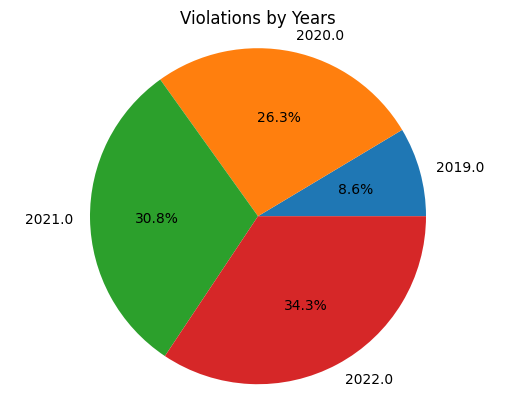

In [63]:
data = pd.read_csv("2022 GDPR_fines_cleaned.csv")
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y", errors='coerce')
data['Year'] = data['Date'].dt.year
specific_years = [2019, 2020, 2021, 2022]
filtered_data = data[data['Year'].isin(specific_years)]
year_counts = filtered_data['Year'].value_counts().sort_index()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Violations by Years')
plt.show()



from the chart we get to see that 2019 had the lowest percentage when it comes to number of violations while 2022 had the highest. The cases seem to increase progressively over the years 

Insufficient legal basis for data processing: 505
Non-compliance with general data processing principles: 360
Insufficient technical and organisational measures to ensure information security: 285
Insufficient fulfilment of data subjects rights: 138
Insufficient fulfilment of information obligations: 125
Insufficient cooperation with supervisory authority: 59
Insufficient fulfilment of data breach notification obligations: 25
Unknown: 18
Insufficient data processing agreement: 10
Insufficient involvement of data protection officer: 7
Lack of appointment of data protection officer: 7
Insuffcient fulfilment of data subject rights: 3


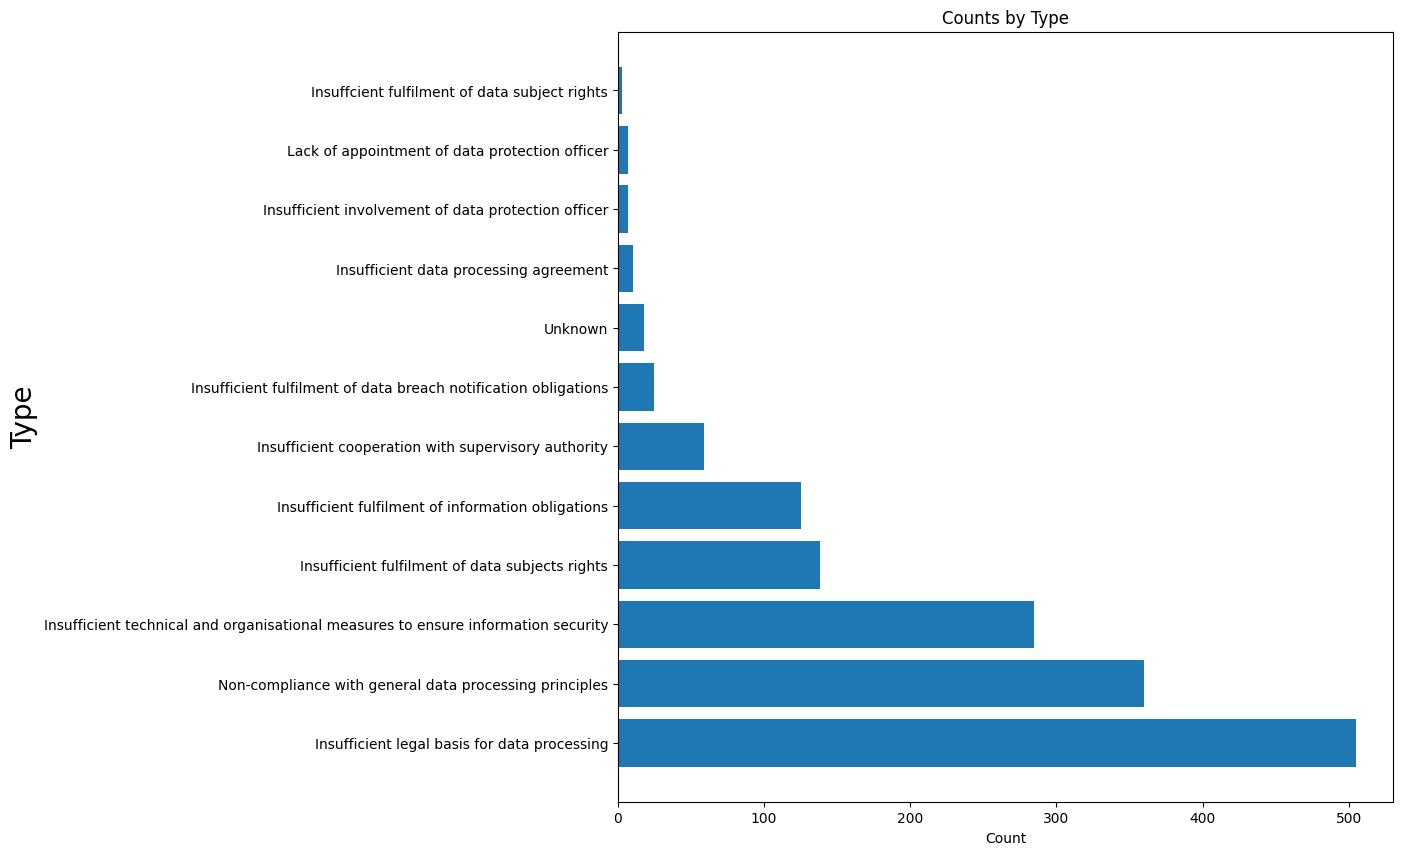

In [73]:
data = pd.read_csv("2022 GDPR_fines_cleaned.csv")
type_counts = data['Type'].value_counts()

for data_value, count in type_counts.items():
    print(f"{data_value}: {count}")
plt.figure(figsize=(10, 10)) 
types = type_counts.index
counts = type_counts.values

# Plot the horizontal bar graph
plt.barh(types, counts)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Type', fontsize = 20)
plt.title('Counts by Type')

plt.show()


Most violation cases seem to have been due to insufficient legal basis for data processing. An example of such is applications giving out some information to third parties without your consent. In Kenya for example we do experience such cases from Safaricom who give out our personal details to third parties for promotion purposes.

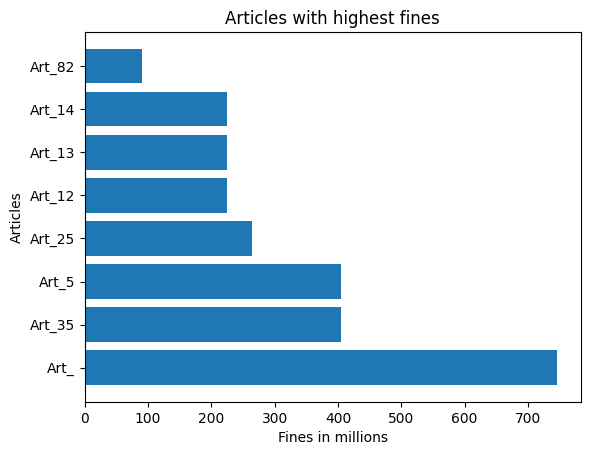

In [34]:
x = np.array(['Art_', 'Art_35', 'Art_5', 'Art_25', 'Art_12', 'Art_13', 'Art_14', 'Art_82'])
y = np.array([746, 405, 405, 265, 225, 225, 225, 90])
plt.title('Articles with highest fines')
plt.ylabel('Articles')
plt.xlabel('Fines in millions')
plt.barh(x, y)
plt.show()

I wasn't in a position to get the details of the articles provided in the data but from it we can clearly see that 'art_' has the most fine when violated

In [17]:
data = gpd.read_file("2022 GDPR_fines_cleaned.csv")
grouped_data = data.groupby('Country')['Amount'].sum().reset_index()
europe = gpd.read_file("ref-countries-2020-01m.shp")  # Replace "europe.shp" with the path to your shapefile or GeoJSON file

# Set the desired CRS
europe = europe.to_crs("EPSG:4326")  # Replace "EPSG:4326" with the desired CRS code
merged_data = europe.merge(grouped_data, on='Country', how='left')
fig, ax = plt.subplots(figsize=(12, 8))

# Customize the appearance of the map and plot the total fines
merged_data.plot(column='Amount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and a title to the map
ax.set_title('Total Fines Levied in European Countries')
ax.set_axis_off()

# Display the map
plt.show()




UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 7: character maps to <undefined>